### Project Category: Healthcare

## Problem Statement: Depression Diagnostic Support Tool
Depression is a common but serious mental health condition that affects how individuals feel, think, and handle daily activities. Timely and accurate diagnosis is critical for effective treatment and improved patient outcomes. However, many healthcare settings face constraints such as limited time, understaffing, or lack of access to mental health specialists — which can delay diagnosis or result in oversight.

The Depression Diagnostic Support Tool is an AI-driven system designed to assist medical practitioners in making quick, data-informed assessments of potential depressive disorders in patients. Using patient-reported responses and clinical indicators from the provided dataset, the tool will classify patients according to their likelihood of experiencing depression.

This diagnostic aid aims to:

Identify individuals at risk of depression based on behavioral, emotional, and physical health indicators.

Offer a preliminary diagnostic flag to support early clinical intervention.

Reduce diagnostic time for practitioners through an interpretable, efficient machine learning model.

The ultimate goal is to support healthcare workers — especially in under-resourced settings — by providing an assistive tool that enhances clinical judgment, supports early mental health intervention, and improves patient care outcomes.

We are going to be dealing with text data and categorize whether a patient has depression or not. This is a classification problem.


In [20]:
# library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Phase 1: About dataset:

This dataset contains survey responses from patients regarding various symptoms associated with depression.  

Each patient answered 14 questions, and the responses are coded from 1 to 6 based on the frequency of experiencing each symptom.  

Additionally, the dataset includes a column indicating the patient's overall depression status.  

Number: Unique identifier for each patient.  

Sleep: Frequency of sleep disturbances (1: Never, 2: Always, 3: Often, 4: Rarely, 5: Sometimes, 6: Not at all).  

Appetite: Changes in appetite (1: Never, 2: Always, 3: Often, 4: Rarely, 5: Sometimes, 6: Not at all).  
 
Interest: Loss of interest in activities (1: Never, 2: Always, 3: Often, 4: Rarely, 5: Sometimes, 6: Not at all).  

Fatigue: Feelings of fatigue or low energy (1: Never, 2: Always, 3: Often, 4: Rarely, 5: Sometimes, 6: Not at all).  

Worthlessness: Feelings of worthlessness or excessive guilt (1: Never, 2: Always, 3: Often, 4: Rarely, 5: Sometimes, 6: Not at all).  

Concentration: Difficulty concentrating (1: Never, 2: Always, 3: Often, 4: Rarely, 5: Sometimes, 6: Not at all).  

Agitation: Physical agitation (1: Never, 2: Always, 3: Often, 4: Rarely, 5: Sometimes, 6: Not at all).  

Suicidal Ideation: Thoughts of self-harm or suicide (1: Never, 2: Always, 3: Often, 4: Rarely, 5: Sometimes, 6: Not at all).  

Sleep Disturbance: Issues with sleeping (1: Never, 2: Always, 3: Often, 4: Rarely, 5: Sometimes, 6: Not at all).  

Aggression: Feelings of aggression (1: Never, 2: Always, 3: Often, 4: Rarely, 5: Sometimes, 6: Not at all).  

Panic Attacks: Experiencing panic attacks (1: Never, 2: Always, 3: Often, 4: Rarely, 5: Sometimes, 6: Not at all).  

Hopelessness: Feelings of hopelessness (1: Never, 2: Always, 3: Often, 4: Rarely, 5: Sometimes, 6: Not at all).  

Restlessness: Feelings of restlessness (1: Never, 2: Always, 3: Often, 4: Rarely, 5: Sometimes, 6: Not at all).  

Low Energy: Lack of energy (1: Never, 2: Always, 3: Often, 4: Rarely, 5: Sometimes, 6: Not at all).  

Depression State: Overall depression state (categorized as 'No depression', 'Mild', 'Moderate', 'Severe')


In [22]:
df = pd.read_csv("deepression.csv")

In [23]:
df.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate


input features: Sleep, 	Appetite,	Interest,	Fatigue,	Worthlessness,	Concentration,	Agitation,	Suicidal Ideation,	Sleep Disturbance,	Aggression,	Panic Attacks,	Hopelessness,	Restlessness and	Low Energy  
Target feature: Depression State

### Phase 2: Data Preparation

In [26]:
# our target variable is Depression state, let us check how many unique of these we have

df['Depression State'].unique()

array(['Mild', 'Moderate', 'Severe', 'No depression', '\tModerate',
       '\tMild', '\tNo depression', '\tSevere', '2\tNo depression',
       '5\tNo depression', nan], dtype=object)

In [27]:
## we need to trim the spaces to clean things up a bit

df['Depression State'] = df['Depression State'].str.strip()
print(df['Depression State'].unique())

['Mild' 'Moderate' 'Severe' 'No depression' '2\tNo depression'
 '5\tNo depression' nan]


In [28]:
## remove leading numbers in the no depression values

df.loc[df['Depression State'].isin(['2\tNo depression', '5\tNo depression']), 'Depression State'] = 'No depression'

print(df['Depression State'].unique())

['Mild' 'Moderate' 'Severe' 'No depression' nan]


As we can see from the data that we have serveral depression states. No depression against mild, moderate and servere. so it is a multi-class classification that can be done by a way of Random forest. 

In [30]:
df.shape

(813, 16)

In [31]:
df.isnull().sum()

Number                 0
Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64

Note: we have 273
constitute to 33% of the data. going to impute next

In [33]:
from sklearn.impute import SimpleImputer

# List of features with missing values
feature_cols = ['Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
                'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
                'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness', 'Low Energy']

# Drop rows where target is missing
df = df.dropna(subset=['Depression State'])

# Imputer for features - median strategy
imputer = SimpleImputer(strategy='median')

# Fit imputer and transform features
df[feature_cols] = imputer.fit_transform(df[feature_cols])

# Check no more nulls in features or target
print(df[feature_cols].isnull().sum())
print(df['Depression State'].isnull().sum())



Sleep                0
Appetite             0
Interest             0
Fatigue              0
Worthlessness        0
Concentration        0
Agitation            0
Suicidal Ideation    0
Sleep Disturbance    0
Aggression           0
Panic Attacks        0
Hopelessness         0
Restlessness         0
Low Energy           0
dtype: int64
0


In [34]:
df.shape

(540, 16)

The null values have been removed instead of imputations as they are empty even on the target feature

In [46]:
print(df.duplicated().sum())

0


Fixing Label Mismatch and Mapping
Question:

“In our original survey data, 1 = Never, 2 = Always, 3 = Often

The encoding issue was likely due to illogical mapping

In [49]:
mapping = {
    1: 0,  # Never
    6: 0,  # Not at all
    4: 1,  # Rarely
    5: 2,  # Sometimes
    3: 3,  # Often
    2: 4   # Always
}

for col in feature_cols:
    df[col] = df[col].map(mapping)


the new mapping above maps according to severerity of the option occurence. from never to always

#### Explanatory Data Analysis

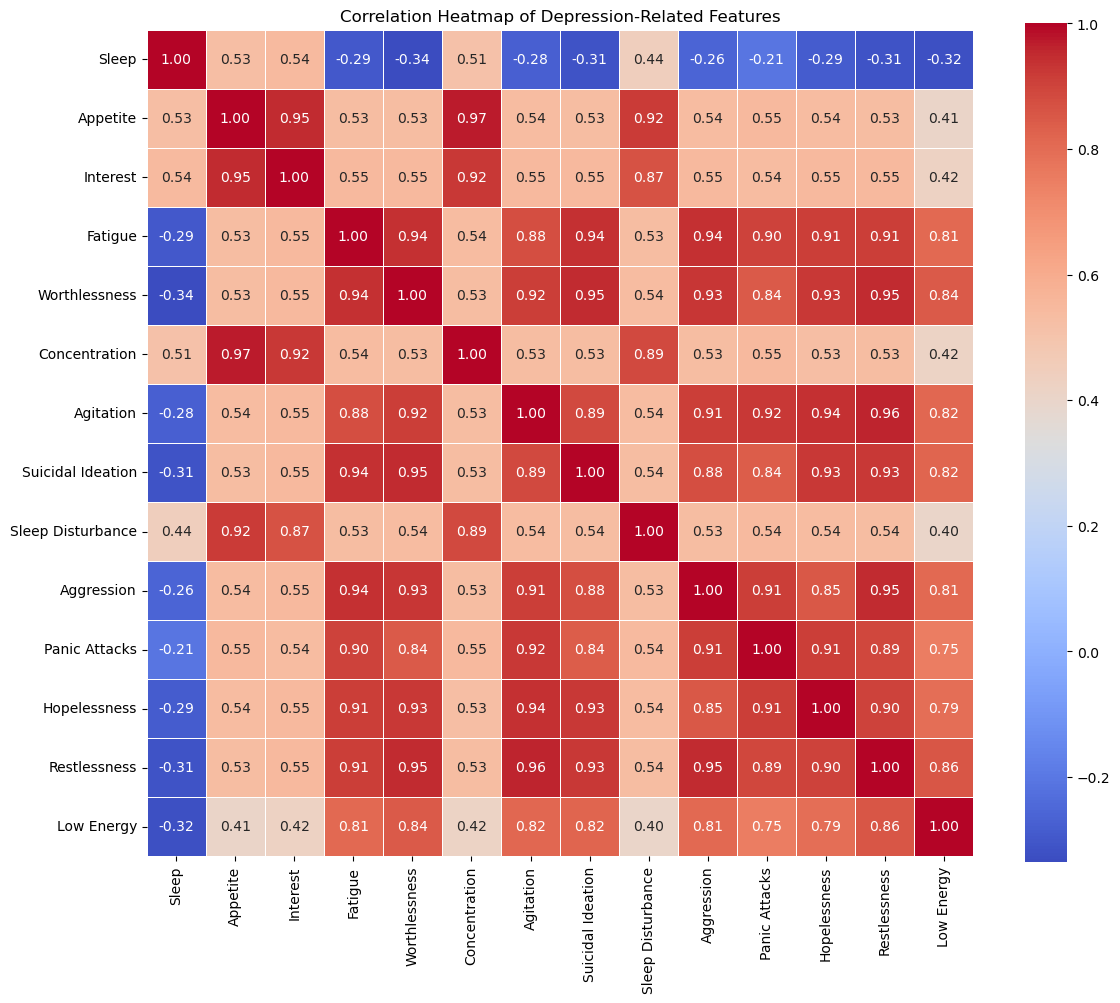

In [69]:
# Drop non-numeric and target columns
numeric_df = df.drop(columns=["Number ", "Depression State"])

# Drop rows with missing values for correlation analysis
numeric_df_clean = numeric_df.dropna()

# Compute correlation matrix
correlation_matrix = numeric_df_clean.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Depression-Related Features")
plt.tight_layout()
plt.show()

Key Observations
Many features are positively correlated, which makes sense since symptoms like hopelessness, low energy, and worthlessness often occur together.

Strong correlations include:

Hopelessness and Worthlessness

Low Energy and Fatigue

Restlessness and Agitation

<Axes: xlabel='Sleep', ylabel='count'>

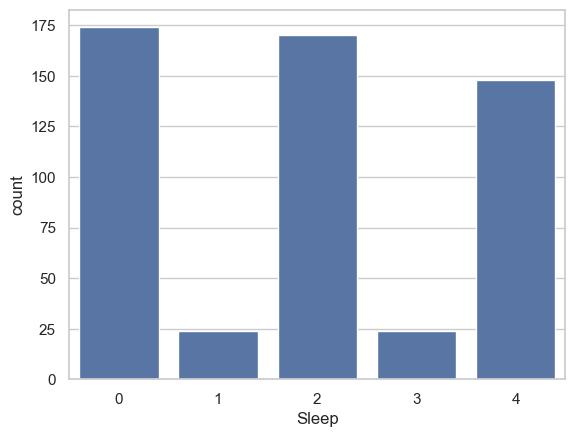

In [82]:
sns.countplot(x='Sleep', data=df)


most patients(~) never experience sleep disturbances, but also we have that approximately 165 patients sometimes experience sleep disturbances and almost  always experience sleep disturbances.

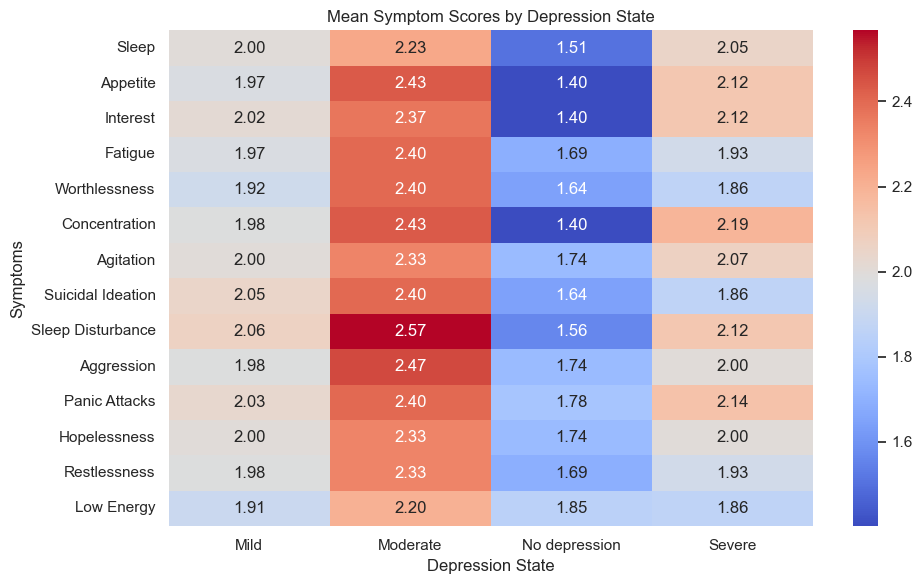

In [87]:
# Drop rows with missing values in numeric features or target
df_clean = df.dropna(subset=df.columns.drop(["Number "]))  # keep only complete rows

# Group by depression state and calculate mean of each feature
grouped_means = df_clean.groupby("Depression State").mean().drop(columns=["Number "])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_means.T, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mean Symptom Scores by Depression State")
plt.ylabel("Symptoms")
plt.xlabel("Depression State")
plt.tight_layout()
plt.show()

given the ordinal scale from 1 to 6, which was then mapped to give a scale from 0 to 4, the highest mean was 2.57. This mean score shows us that sleep disturbance is highly associated with moderate depression. following that is aggression  which is at a mean value of 2.47 for moderate depression state.  From the plot above, No depression state correlates lowly with all the symptoms of shown. The depression state with the highest mean scores for all the symptoms is moderate depression.

C:\Users\idani\AppData\Local\Temp\ipykernel_25344\4225848134.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression State', y=col, data=subset, palette='Set3')
C:\Users\idani\AppData\Local\Temp\ipykernel_25344\4225848134.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression State', y=col, data=subset, palette='Set3')
C:\Users\idani\AppData\Local\Temp\ipykernel_25344\4225848134.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression State', y=col, data=subset, palette='Set3')
C:\Users\idani\AppData\Local\Te

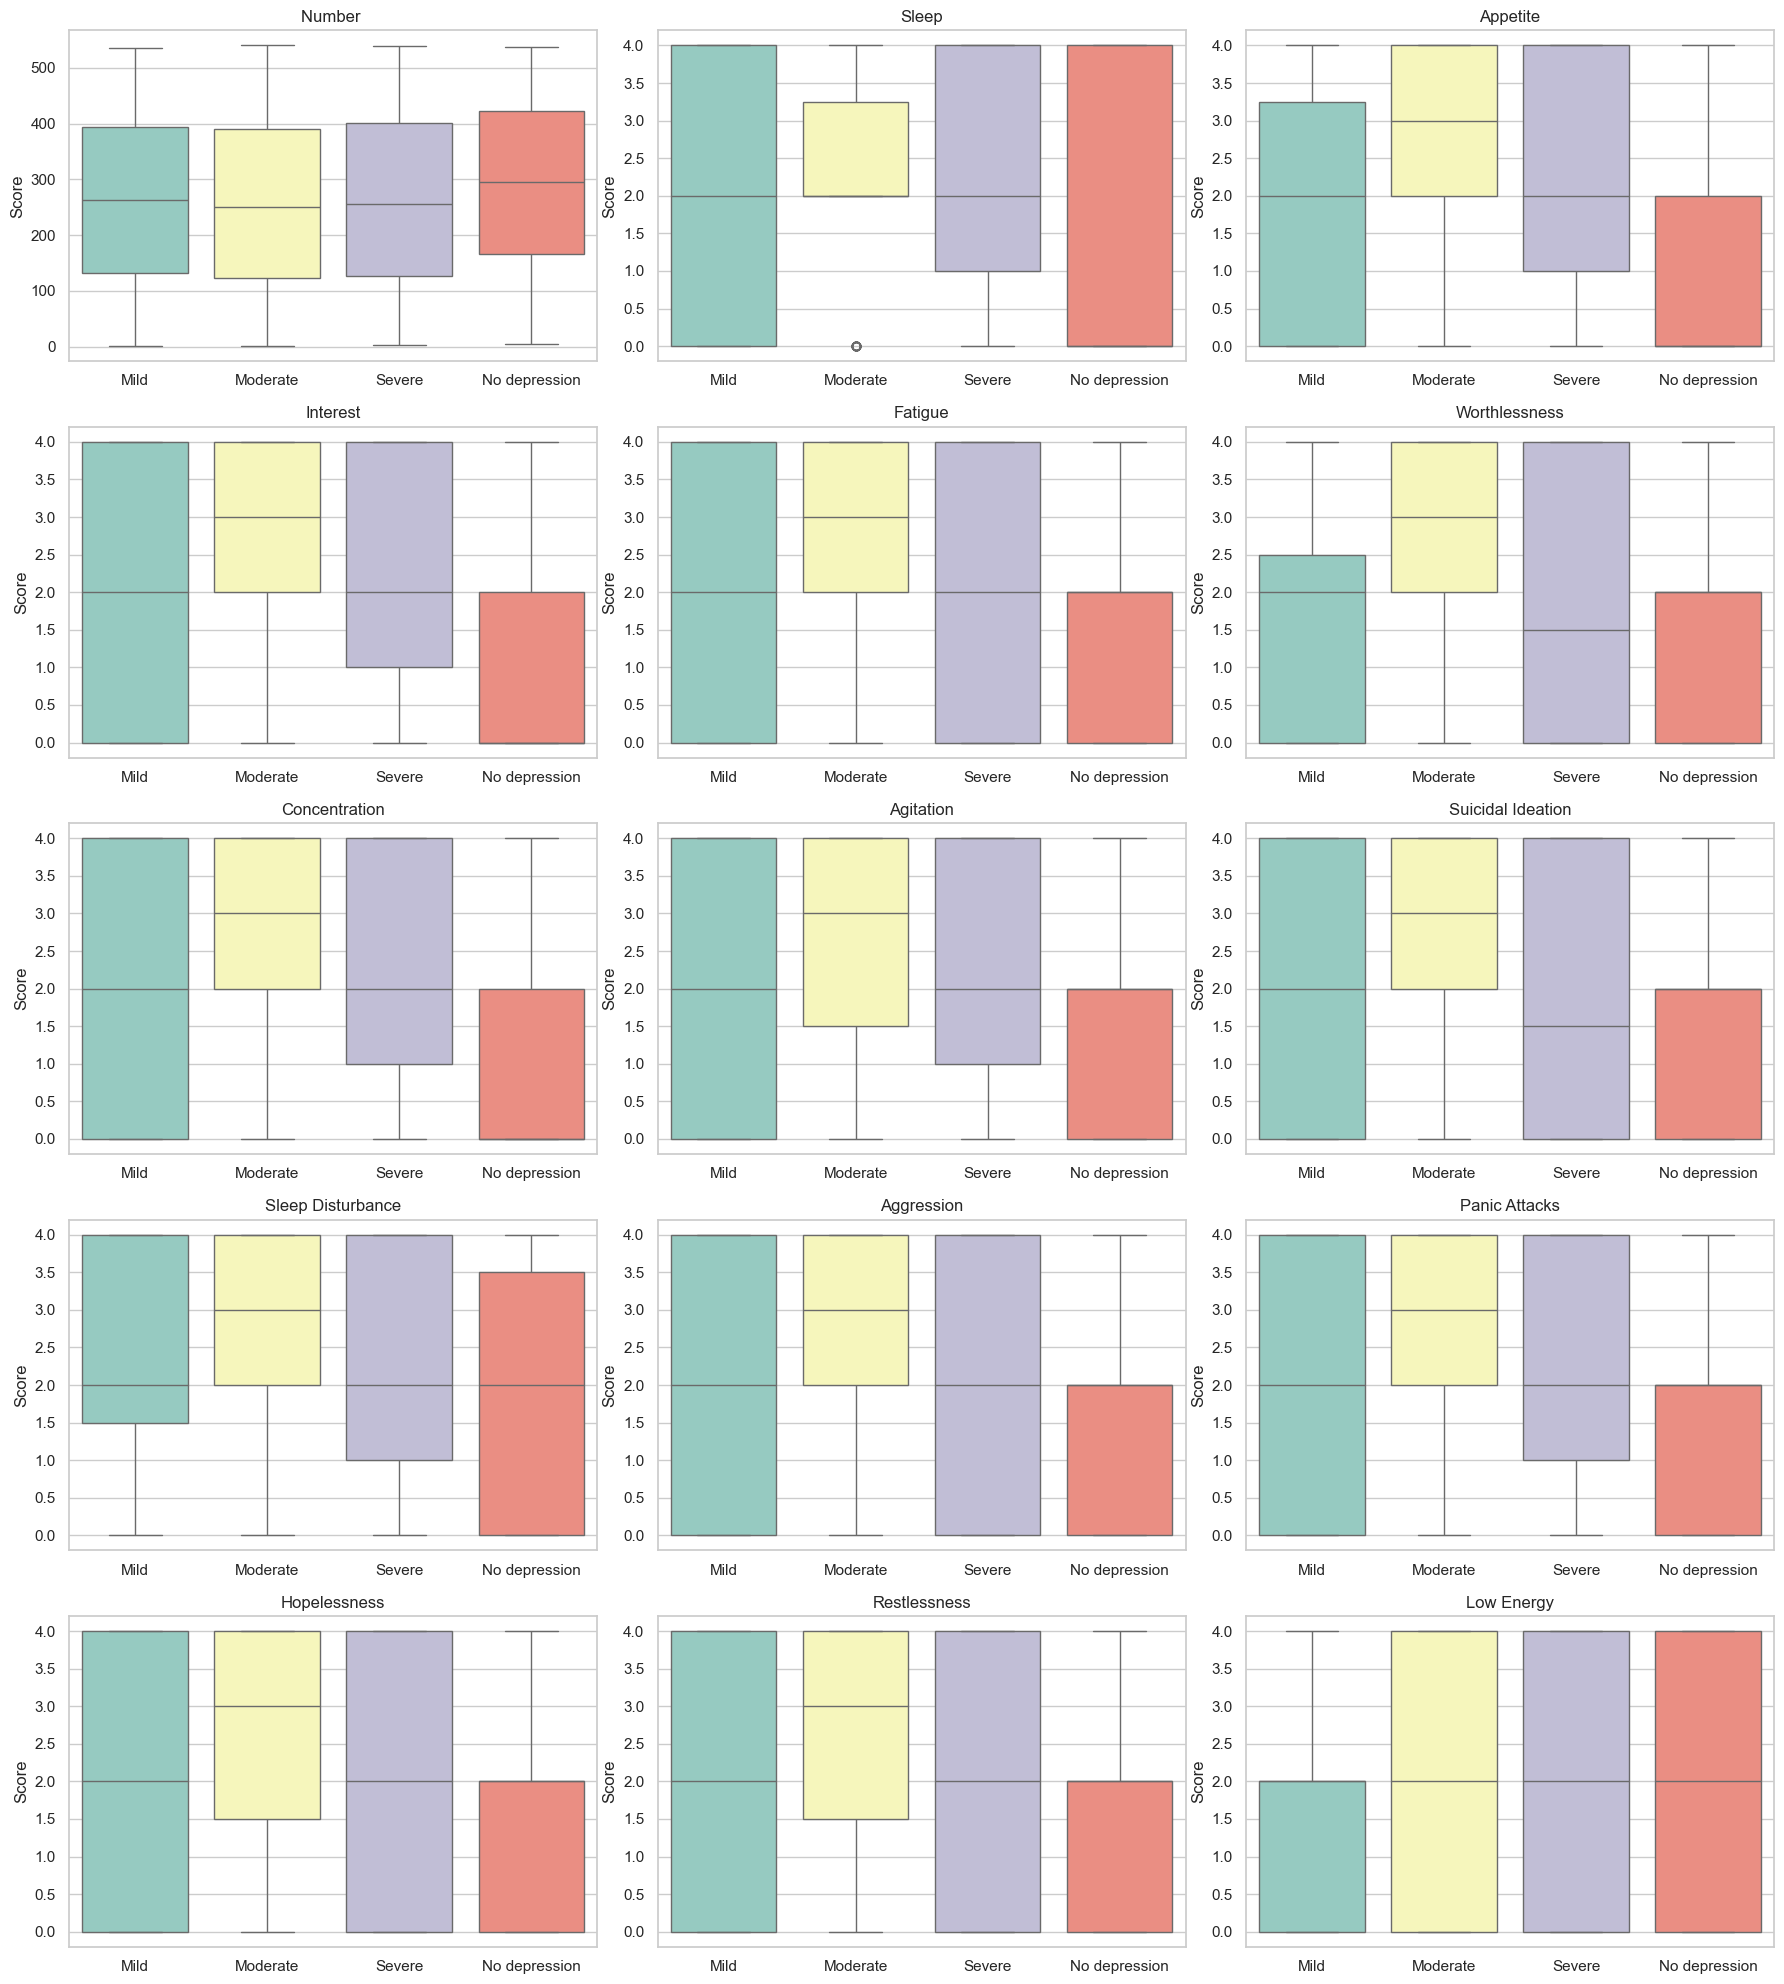

In [90]:

# Identify the symptom columns by excluding non-numeric and target columns
non_symptom_cols = ['Depression State']
symptom_cols = [col for col in df.columns if col not in non_symptom_cols and df[col].dtype != 'object']

# Filter relevant depression states
subset = df[df['Depression State'].isin(['Moderate', 'Severe', 'Mild', 'No depression'])]

# Plot settings
n_cols = 3  # number of columns in subplot grid
n_rows = (len(symptom_cols) + n_cols - 1) // n_cols  # compute needed rows

# Create figure and subplots
plt.figure(figsize=(n_cols * 6, n_rows * 4))

# Create boxplots
for i, col in enumerate(symptom_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='Depression State', y=col, data=subset, palette='Set3')
    plt.title(col)
    plt.ylabel("Score")
    plt.xlabel("")

plt.tight_layout()
plt.show()


interpretation of box and whisker diagrams:

### Train, validation, test

In [94]:
X, y = df.loc[ : , (df.columns != 'Depression State')],df['Depression State']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)


### Phase 3: Model Development

In [97]:
## convert our depression states (target variable) into numbers (variable encoding)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Use the same encoder to transform y_val and y_test
# This ensures consistent mapping (e.g., 'Mild' = 0, 'Moderate' = 1, etc.)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

In [99]:
print(label_encoder.classes_)


['Mild' 'Moderate' 'No depression' 'Severe']


In [101]:
# Standardize the feature variables to have zero mean and unit variance.
# This is crucial for many ML algorithms that are sensitive to the scale of input features
# (e.g., Logistic Regression, SVM, KNN, Neural Networks).
# We fit the scaler only on the training data to avoid data leakage,
# then apply the same transformation to validation and test sets.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [103]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)

test_accuracy= accuracy_score(y_val, y_pred)
print(f'Test Accuracy: {test_accuracy: 4f}')

print("\nClassification Report:\n:", classification_report(y_val, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_val, y_pred))

Test Accuracy:  0.287037

Classification Report:
:               precision    recall  f1-score   support

           0       0.30      0.34      0.32        29
           1       0.23      0.33      0.27        21
           2       0.32      0.18      0.23        38
           3       0.32      0.35      0.33        20

    accuracy                           0.29       108
   macro avg       0.29      0.30      0.29       108
weighted avg       0.30      0.29      0.28       108


Confusion Matrix: 
 [[10  8  6  5]
 [ 6  7  5  3]
 [13 11  7  7]
 [ 4  5  4  7]]


In [105]:
## rf model underfitting, vibe coding the more models to see what works

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on validation data
y_val_pred = log_reg.predict(X_val)

#  Evaluate the model
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

#  (Optional) Predict on test data
y_test_pred = log_reg.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))

Validation Accuracy: 0.25925925925925924

Confusion Matrix:
 [[ 0 13 11  5]
 [ 0  7  6  8]
 [ 0 11 17 10]
 [ 0  5 11  4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.19      0.33      0.25        21
           2       0.38      0.45      0.41        38
           3       0.15      0.20      0.17        20

    accuracy                           0.26       108
   macro avg       0.18      0.25      0.21       108
weighted avg       0.20      0.26      0.22       108


Test Accuracy: 0.3148148148148148


C:\Users\idani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\idani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\idani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [107]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Generate polynomial features (adds interaction terms and nonlinear features)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Logistic regression with less regularization (C=10)
log_reg_poly = LogisticRegression(C=10.0, max_iter=1000, random_state=42)
log_reg_poly.fit(X_train_poly, y_train)

# Predict on validation set
y_val_pred_poly = log_reg_poly.predict(X_val_poly)

# Evaluate
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_poly))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred_poly))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_poly))

# Predict on test set
y_test_pred_poly = log_reg_poly.predict(X_test_poly)
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred_poly))




Validation Accuracy: 0.37962962962962965

Confusion Matrix:
 [[ 8  6 10  5]
 [ 1  7  7  6]
 [ 2 12 17  7]
 [ 0  5  6  9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.28      0.40        29
           1       0.23      0.33      0.27        21
           2       0.42      0.45      0.44        38
           3       0.33      0.45      0.38        20

    accuracy                           0.38       108
   macro avg       0.43      0.38      0.37       108
weighted avg       0.45      0.38      0.39       108


Test Accuracy: 0.4537037037037037


In [79]:
import xgboost as xgb
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = xgb_model.predict(X_val)

# Evaluate
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# Predict on test set
y_test_pred = xgb_model.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))


C:\Users\idani\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:32:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Accuracy: 0.26851851851851855

Confusion Matrix:
 [[ 9  8  9  3]
 [ 7  5  6  3]
 [12 11  8  7]
 [ 3  6  4  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.31      0.30        29
           1       0.17      0.24      0.20        21
           2       0.30      0.21      0.25        38
           3       0.35      0.35      0.35        20

    accuracy                           0.27       108
   macro avg       0.28      0.28      0.27       108
weighted avg       0.28      0.27      0.27       108


Test Accuracy: 0.3055555555555556


In [109]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Initialize base model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to try
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit search
random_search.fit(X_train, y_train)

# Best model from search
best_xgb = random_search.best_estimator_

# Predict and evaluate
y_val_pred = best_xgb.predict(X_val)

print("Best Parameters:", random_search.best_params_)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8}
Validation Accuracy: 0.4444444444444444

Confusion Matrix:
 [[ 8  2 12  7]
 [ 0  6  9  6]
 [ 0  5 24  9]
 [ 0  3  7 10]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.28      0.43        29
           1       0.38      0.29      0.32        21
           2       0.46      0.63      0.53        38
           3       0.31      0.50      0.38        20

    accuracy                           0.44       108
   macro avg       0.54      0.42      0.42       108
weighted avg       0.56      0.44      0.44       108



C:\Users\idani\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:20:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [113]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Train on training data
svm_model.fit(X_train, y_train)

# Predict on validation set
y_pred_svm = svm_model.predict(X_val)

# Evaluate performance
val_accuracy = accuracy_score(y_val, y_pred_svm)
print(f"Validation Accuracy: {val_accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_val, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_svm))


Validation Accuracy: 0.4167

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.28      0.43        29
           1       0.31      0.24      0.27        21
           2       0.45      0.58      0.51        38
           3       0.29      0.50      0.36        20

    accuracy                           0.42       108
   macro avg       0.51      0.40      0.39       108
weighted avg       0.54      0.42      0.41       108


Confusion Matrix:
 [[ 8  2 12  7]
 [ 0  5  8  8]
 [ 0  6 22 10]
 [ 0  3  7 10]]


So we have a multi-class problem and small dataset. this might have lead to our data underfitting. what we are going to try next is to collapse our classes to binary

In [115]:
# Define a binary version of the Depression State
df['Binary_State'] = df['Depression State'].apply(lambda x: 'Not Depressed' if x == 'No depression' else 'Depressed')

# Check distribution
print(df['Binary_State'].value_counts())


Binary_State
Depressed        366
Not Depressed    174
Name: count, dtype: int64


the distribution in our dataset is It’s moderately imbalanced.

Many models (especially Logistic Regression, SVM, etc.) may favor the majority class, leading to lower recall or precision for the minority class.

our model might predict “Depressed” most of the time, even when “Not Depressed” is true, just to maximize accuracy.

Validation Accuracy: 0.7093023255813954

Confusion Matrix:
 [[ 6 22]
 [ 3 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.21      0.32        28
           1       0.71      0.95      0.81        58

    accuracy                           0.71        86
   macro avg       0.69      0.58      0.57        86
weighted avg       0.70      0.71      0.66        86

ROC AUC Score: 0.707820197044335


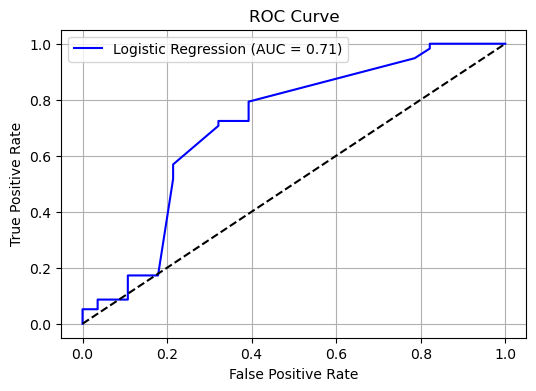

In [134]:
from sklearn.metrics import roc_auc_score, roc_curve


# STEP 1: Select features and define binary target
feature_columns = [
    'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
    'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
    'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness', 'Low Energy'
]

# Create binary label: 1 = Depressed, 0 = Not Depressed
df['Binary_State'] = df['Depression State'].apply(lambda x: 0 if x == 'No depression' else 1)

X = df[feature_columns]
y = df['Binary_State']

# STEP 2: Train/Val/Test split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=42
)

# STEP 3: Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# STEP 4: Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# STEP 5: Predict and evaluate
y_val_pred = log_reg.predict(X_val)
y_val_prob = log_reg.predict_proba(X_val)[:, 1]

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_val_prob))

# STEP 6: ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_val, y_val_prob):.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


from the classification matrix: True Negatives (TN) = 6 → Correctly predicted Not Depressed

False Positives (FP) = 22 → Predicted Depressed, but actually Not Depressed

False Negatives (FN) = 3 → Predicted Not Depressed, but actually Depressed

True Positives (TP) = 55 → Correctly predicted Depressed

📊 What this shows:
model is heavily biased toward predicting “Depressed.”

It misclassifies 22 out of 28 Not Depressed cases as Depressed. That’s 78.6% false positives for that class.

However, it performs well on the Depressed class — correctly predicting 55 out of 58 cases (only 3 false negatives).

✅ Why this happens:
data is imbalanced:

Depressed        366
Not Depressed    174
That's about 68% Depressed, 32% Not Depressed.

Logistic Regression by default tries to optimize overall accuracy, so it tends to favor the majority class (Depressed).



model got better at detecting “Not Depressed” — now correctly classifies 18 instead of 6.

It became slightly worse at detecting “Depressed”, dropping from 55 correct to 42.

This is expected — you told the model to treat both classes equally, even though one appears less in the data.

In [119]:
import joblib

# Save the trained logistic regression model
joblib.dump(log_reg, 'logistic_model.pkl')


['logistic_model.pkl']

In [121]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']